# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor, XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/house-price-dataset-of-india/House Price India.csv


# Load data

In [2]:
df = pd.read_csv("/kaggle/input/house-price-dataset-of-india/House Price India.csv")
type(df)

pandas.core.frame.DataFrame

# Data Information & Visualization

In [3]:
df.head(10)

id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   
5  6762813105  42491                   3                 2.50         2600   
6  6762813157  42491                   5                 3.25         3660   
7  6762813599  42491                   3                 1.75         2240   
8  6762813600  42491                   3                 2.50         2390   
9  6762814461  42491                   4                 2.25         2200   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   
5      4750               1.0                   0                0   
6     11995               2.0                   0                2   
7     10578               2.0                   0                0   
8      6550               1.0                   0                2   
9     11250               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...        1921                0       122003   
1                       5  ...        1909                0       122004   
2                       3  ...        1939                0       122004   
3                       3  ...        2001                0       122005   
4                       4  ...        1929                0       122006   
5                       4  ...        1951                0       122007   
6                       3  ...        2006                0       122008   
7                       5  ...        1923                0       122006   
8                       4  ...        1955                0       122009   
9                       5  ...        1920                0       122010   

   Lattitude  Longitude  living_area_renov  lot_area_renov  \
0    52.8645   -114.557               2880            5400   
1    52.8878   -114.470               2470            4000   
2    52.8852   -114.468               2940            6600   
3    52.9532   -114.321               3350           42847   
4    52.9047   -114.485               2060            4500   
5    52.9133   -114.590               2380            4750   
6    52.7637   -114.050               3320           11241   
7    52.9254   -114.482               1570           10578   
8    52.8014   -114.598               2010            6550   
9    52.9145   -114.391               2320           10814   

   Number of schools nearby  Distance from the airport    Price  
0                         2                         58  2380000  
1                         2                         51  1400000  
2                         1                         53  1200000  
3                         3                         76   838000  
4                         1                         51   805000  
5                         1                         67   790000  
6                         3                         72   785000  
7                         3                         71   750000  
8                         1                         73   750000  
9                         2                         53   698000  

[10 rows x 23 columns]

In [4]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [5]:
df.shape

(14620, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [7]:
df.describe().T

count          mean            std  \
id                                     14620.0  6.762821e+09    6237.574799   
Date                                   14620.0  4.260454e+04      67.347991   
number of bedrooms                     14620.0  3.379343e+00       0.938719   
number of bathrooms                    14620.0  2.129583e+00       0.769934   
living area                            14620.0  2.098263e+03     928.275721   
lot area                               14620.0  1.509328e+04   37919.621304   
number of floors                       14620.0  1.502360e+00       0.540239   
waterfront present                     14620.0  7.660739e-03       0.087193   
number of views                        14620.0  2.331053e-01       0.766259   
condition of the house                 14620.0  3.430506e+00       0.664151   
grade of the house                     14620.0  7.682421e+00       1.175033   
Area of the house(excluding basement)  14620.0  1.801784e+03     833.809963   
Area of the basement                   14620.0  2.964791e+02     448.551409   
Built Year                             14620.0  1.970926e+03      29.493625   
Renovation Year                        14620.0  9.092401e+01     416.216661   
Postal Code                            14620.0  1.220331e+05      19.082418   
Lattitude                              14620.0  5.279285e+01       0.137522   
Longitude                              14620.0 -1.144040e+02       0.141326   
living_area_renov                      14620.0  1.996702e+03     691.093366   
lot_area_renov                         14620.0  1.275350e+04   26058.414467   
Number of schools nearby               14620.0  2.012244e+00       0.817284   
Distance from the airport              14620.0  6.495096e+01       8.936008   
Price                                  14620.0  5.389322e+05  367532.380804   

                                                min           25%  \
id                                     6.762810e+09  6.762815e+09   
Date                                   4.249100e+04  4.254600e+04   
number of bedrooms                     1.000000e+00  3.000000e+00   
number of bathrooms                    5.000000e-01  1.750000e+00   
living area                            3.700000e+02  1.440000e+03   
lot area                               5.200000e+02  5.010750e+03   
number of floors                       1.000000e+00  1.000000e+00   
waterfront present                     0.000000e+00  0.000000e+00   
number of views                        0.000000e+00  0.000000e+00   
condition of the house                 1.000000e+00  3.000000e+00   
grade of the house                     4.000000e+00  7.000000e+00   
Area of the house(excluding basement)  3.700000e+02  1.200000e+03   
Area of the basement                   0.000000e+00  0.000000e+00   
Built Year                             1.900000e+03  1.951000e+03   
Renovation Year                        0.000000e+00  0.000000e+00   
Postal Code                            1.220030e+05  1.220170e+05   
Lattitude                              5.238590e+01  5.270760e+01   
Longitude                             -1.147090e+02 -1.145190e+02   
living_area_renov                      4.600000e+02  1.490000e+03   
lot_area_renov                         6.510000e+02  5.097750e+03   
Number of schools nearby               1.000000e+00  1.000000e+00   
Distance from the airport              5.000000e+01  5.700000e+01   
Price                                  7.800000e+04  3.200000e+05   

                                                50%           75%  \
id                                     6.762821e+09  6.762826e+09   
Date                                   4.260000e+04  4.266200e+04   
number of bedrooms                     3.000000e+00  4.000000e+00   
number of bathrooms                    2.250000e+00  2.500000e+00   
living area                            1.930000e+03  2.570000e+03   
lot area                               7.620000e+03  1.080000e+04   
numb

In [8]:
df = df.drop(columns=['id','Date'])
df

number of bedrooms  number of bathrooms  living area  lot area  \
0                       5                 2.50         3650      9050   
1                       4                 2.50         2920      4000   
2                       5                 2.75         2910      9480   
3                       4                 2.50         3310     42998   
4                       3                 2.00         2710      4500   
...                   ...                  ...          ...       ...   
14615                   2                 1.50         1556     20000   
14616                   3                 2.00         1680      7000   
14617                   2                 1.00         1070      6120   
14618                   4                 1.00         1030      6621   
14619                   3                 1.00          900      4770   

       number of floors  waterfront present  number of views  \
0                   2.0                   0                4   
1                   1.5                   0                0   
2                   1.5                   0                0   
3                   2.0                   0                0   
4                   1.5                   0                0   
...                 ...                 ...              ...   
14615               1.0                   0                0   
14616               1.5                   0                0   
14617               1.0                   0                0   
14618               1.0                   0                0   
14619               1.0                   0                0   

       condition of the house  grade of the house  \
0                           5                  10   
1                           5                   8   
2                           3                   8   
3                           3                   9   
4                           4                   8   
...                       ...                 ...   
14615                       4                   7   
14616                       4                   7   
14617                       3                   6   
14618                       4                   6   
14619                       3                   6   

       Area of the house(excluding basement)  ...  Built Year  \
0                                       3370  ...        1921   
1                                       1910  ...        1909   
2                                       2910  ...        1939   
3                                       3310  ...        2001   
4                                       1880  ...        1929   
...                                      ...  ...         ...   
14615                                   1556  ...        1957   
14616                                   1680  ...        1968   
14617                                   1070  ...        1962   
14618                                   1030  ...        1955   
14619                                    900  ...        1969   

       Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
0                    0       122003    52.8645   -114.557               2880   
1                    0       122004    52.8878   -114.470               2470   
2                    0       122004    52.8852   -114.468               2940   
3                    0       122005    52.9532   -114.321               3350   
4                    0       122006    52.9047   -114.485               2060   
...                ...          ...        ...        ...                ...   
14615                0       122066    52.6191   -114.472               2250   
14616                0       122072    52.5075   -114.393               1540   
14617                0       122056    52.7289   -114.507               1130   
14618                0       122042    52.7157   -114.411               1420   
14619             2009       122018    52.5338   -114.552      

In [9]:
def rename_columns(columns):
    return columns.lower().replace(' ','_')

In [10]:
df.rename(columns=rename_columns, inplace=True)

In [11]:
df.columns

Index(['number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
       'number_of_floors', 'waterfront_present', 'number_of_views',
       'condition_of_the_house', 'grade_of_the_house',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'built_year', 'renovation_year', 'postal_code', 'lattitude',
       'longitude', 'living_area_renov', 'lot_area_renov',
       'number_of_schools_nearby', 'distance_from_the_airport', 'price'],
      dtype='object')

<AxesSubplot:>

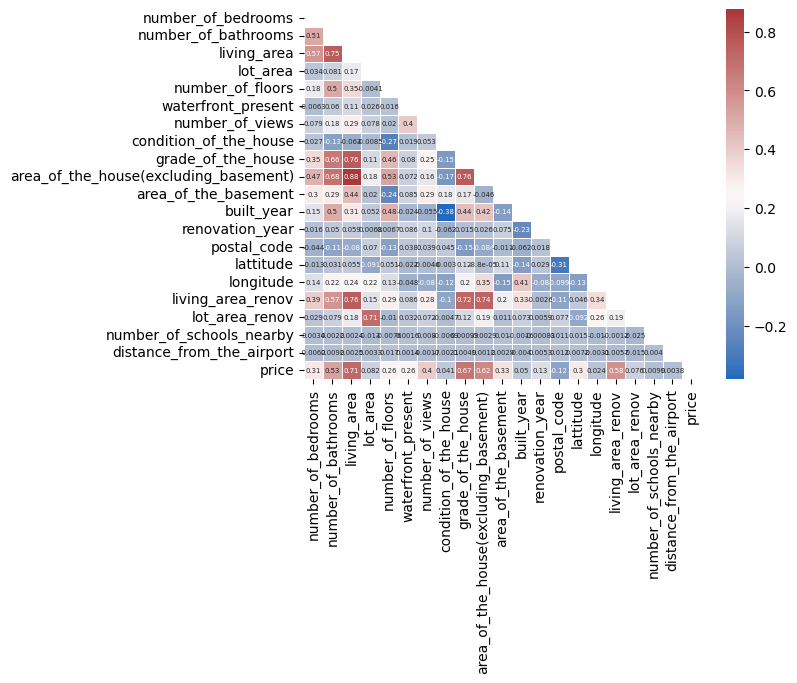

In [12]:
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), mask=matrix, cmap='vlag',
            linewidths=0.5, linecolor='white',annot=True, annot_kws={'size':5})

Text(0.5, 1.0, 'Prices distribution')

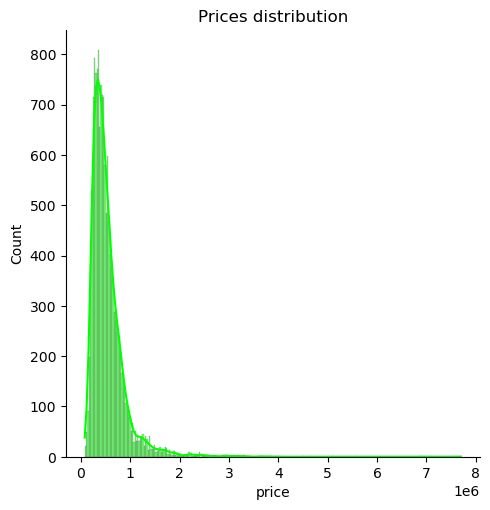

In [13]:
sns.displot(df.price, kde = True, color='lime')
plt.title('Prices distribution')

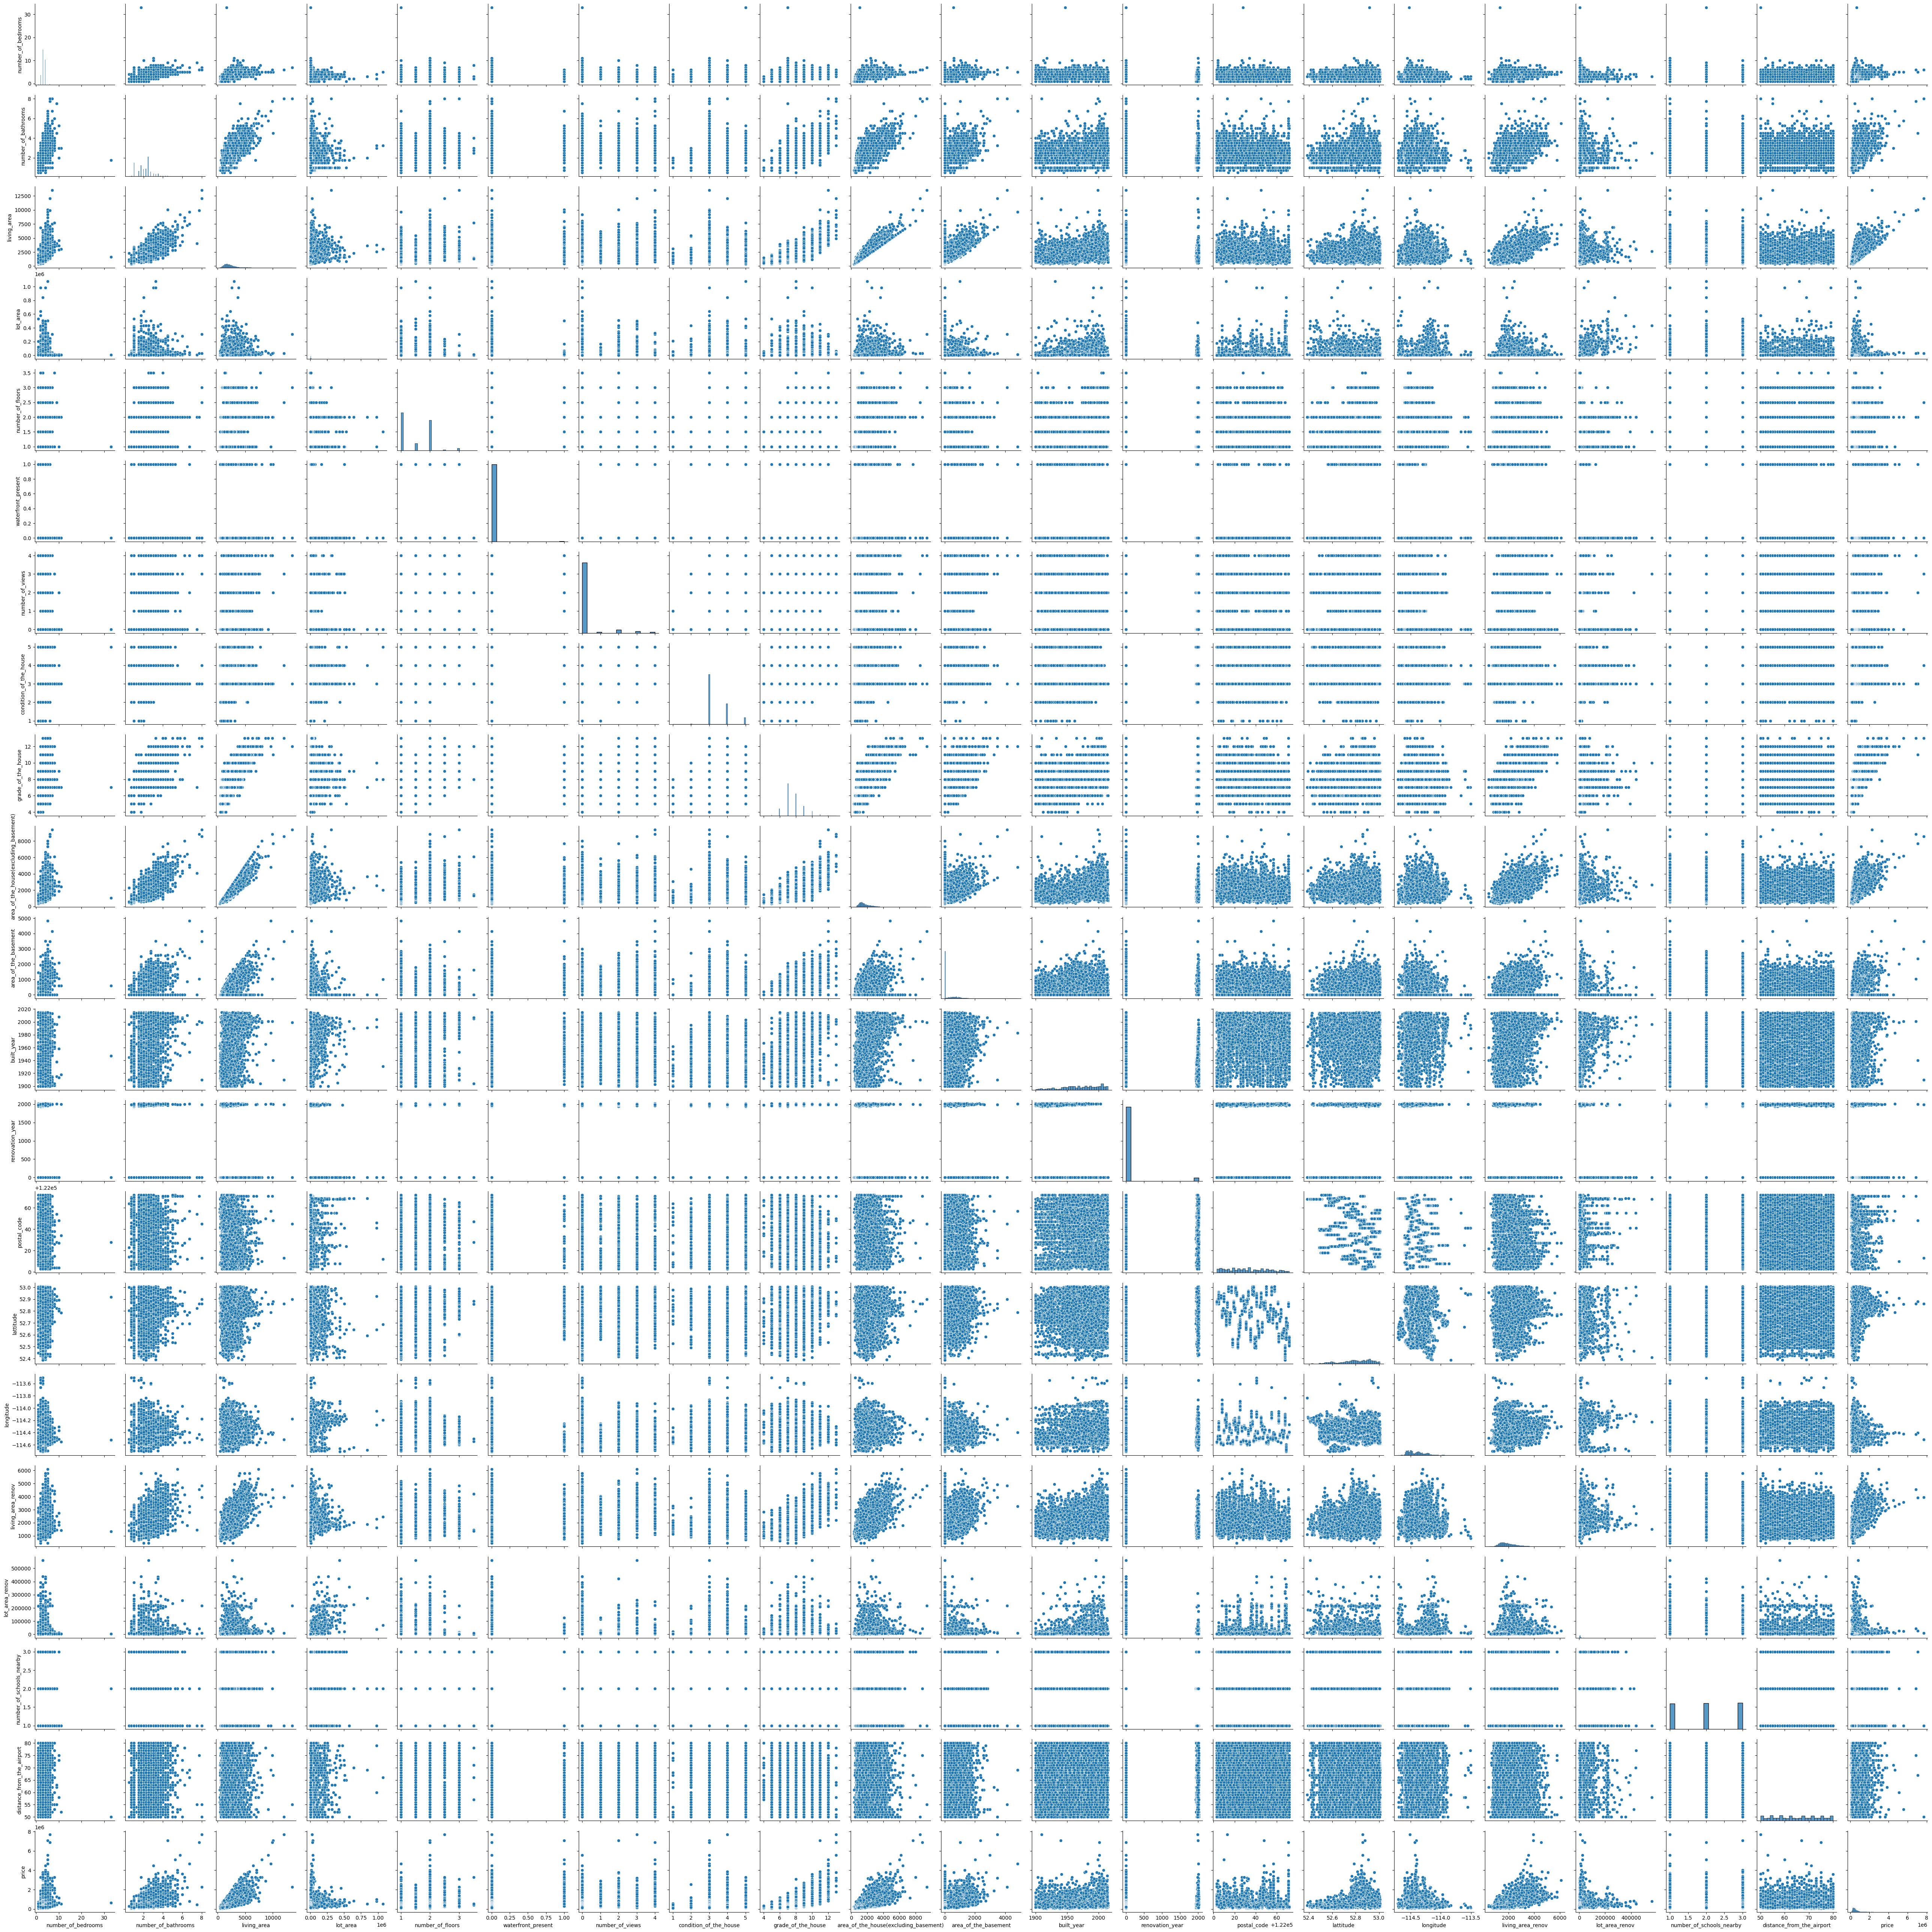

In [14]:
sns.pairplot(df)

# Train & Test Splitting the Data

In [15]:
train, test = train_test_split(df, test_size = 0.2)

In [16]:
x_train = train.iloc[:, :20].values
x_test = test.iloc[:, :20].values

In [17]:
y_train = train['price'].values
y_test = test['price'].values

In [18]:
def perform(y_pred):
    print("MSE",round(mean_squared_error(y_test,y_pred), 3))
    print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
    print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
    print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
    print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

# Linear Regression

In [19]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred_lr = model_lr.predict(x_test)

Text(0.5, 1.0, 'LinearRegressor')

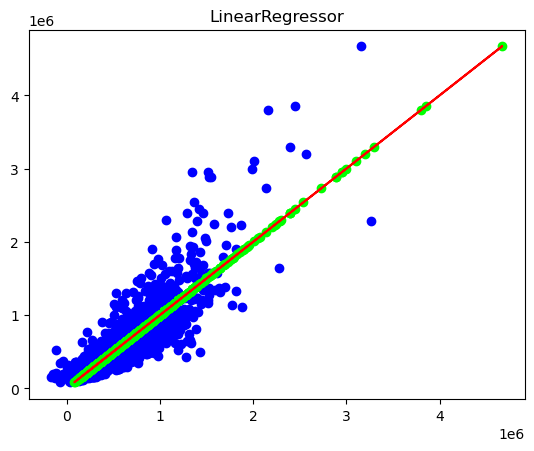

In [21]:
plt.scatter(y_pred_lr, y_test, color='blue', marker='o')
plt.scatter(y_test, y_test, color='lime', marker='o')
plt.plot(y_test, y_test, color="red", lw=1.5)
plt.title("LinearRegressor")

In [22]:
perform(y_pred_lr)

MSE 35691971489.951
RMSE 188923.189
MAE 123730.296
MAPE 0.25
R2 Score :  0.718


# Decision Tree Regressor

In [23]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [24]:
y_pred_dt = model_dt.predict(x_test)

Text(0.5, 1.0, 'DecisionTreeRegressor')

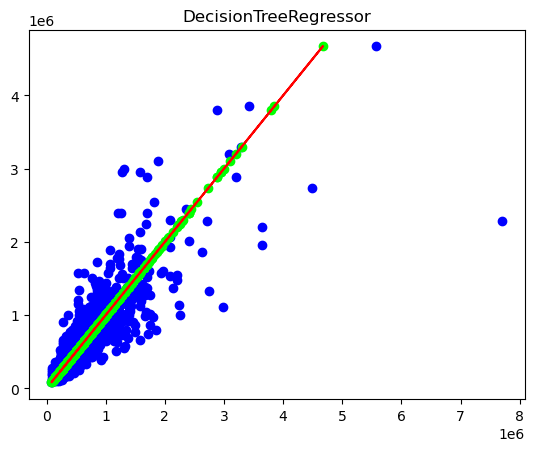

In [25]:
plt.scatter(y_pred_dt, y_test, color='blue', marker='o')
plt.scatter(y_test, y_test, color='lime', marker='o')
plt.plot(y_test, y_test, color="red", lw=1.5)
plt.title("DecisionTreeRegressor")

In [26]:
perform(y_pred_dt)

MSE 42247969028.708
RMSE 205543.107
MAE 99027.13
MAPE 0.176
R2 Score :  0.667


# XGBRF Regressor

In [27]:
model_xgbrf = XGBRFRegressor()
model_xgbrf.fit(x_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [28]:
y_pred_xgbrf = model_xgbrf.predict(x_test)

Text(0.5, 1.0, 'XGBRFRegressor')

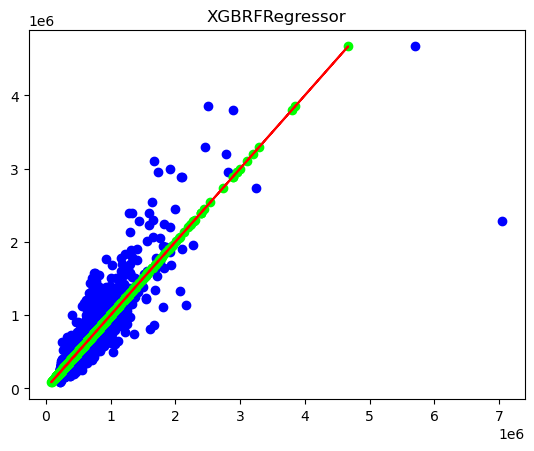

In [29]:
plt.scatter(y_pred_xgbrf, y_test, color='blue', marker='o')
plt.scatter(y_test, y_test, color='lime', marker='o')
plt.plot(y_test, y_test, color="red", lw=1.5)
plt.title("XGBRFRegressor")

In [30]:
perform(y_pred_xgbrf)

MSE 30885773957.173
RMSE 175743.489
MAE 93515.466
MAPE 0.177
R2 Score :  0.756


# XGB Regressor

In [31]:
model_xgb = XGBRegressor()
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [32]:
y_pred_xgb = model_xgb.predict(x_test)

Text(0.5, 1.0, 'XGBRegressor')

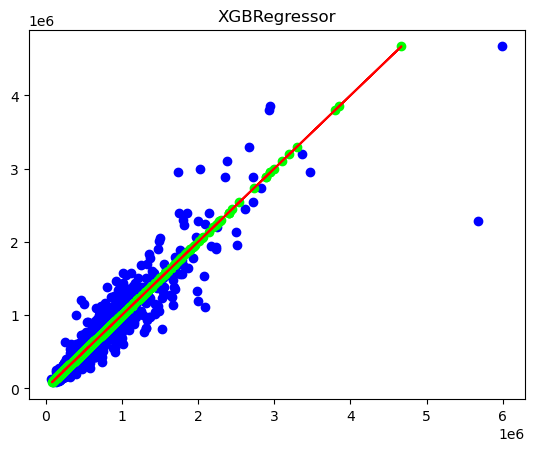

In [33]:
plt.scatter(y_pred_xgb, y_test, color='blue', marker='o')
plt.scatter(y_test, y_test, color='lime', marker='o')
plt.plot(y_test, y_test, color="red", lw=1.5)
plt.title("XGBRegressor")

In [34]:
perform(y_pred_xgb)

MSE 17228400215.7
RMSE 131257.001
MAE 67954.111
MAPE 0.125
R2 Score :  0.864
